# Домашнее задание №1.

## Работу выполнил: Шмелев Иван, 3821Б1ФИ1

Задача классификации: прогнозирование пола по увлечениям и доп хар-ам.

Датасет "Young People Survey" содержит результаты опроса молодых людей, включая информацию о их поведении, привычках и личных характеристиках. Он включает данные о таких аспектах, как употребление алкоголя, курение, физическая активность, питание, а также демографические данные, такие как возраст, пол и уровень образования.

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving responses.csv to responses.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

humans_data = pd.read_csv('responses.csv')

In [ ]:
humans_data.shape

(1010, 150)

In [ ]:
humans_data

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


## Наши данные

Наши значения принимаются от 1 и до 5, где 1 - мало люблю, а 5 - сильно люблю.

Но есть и словесные признаки, такие как Alcohol, Smoking и тд

Music: Музыка  
Переменные отражают предпочтения в различных музыкальных жанрах (например, классическая музыка, джаз, рок и т.д.).

Movies: Фильмы  
Оценка увлечения разными типами фильмов (например, драмы, ужасы, комедии и т.д.).

Hobbies & Interests: Хобби и интересы  
Отношение к разным видам деятельности и увлечениям (например, чтение, танцы, путешествия и т.д.).

Phobias: Фобии  
Оценка страхов или опасений, таких как страх змей, пауков, темноты и т.д.

Health: Здоровье  
Вопросы, касающиеся здоровья, например, привычки сна, питания, физической активности.

Personality Traits: Черты личности  
Включает оценки личных характеристик, таких как уверенность, терпеливость, экстраверсия.

Spending Habits: Привычки в расходах  
Показывает, на что респонденты чаще всего тратят деньги (например, одежда, еда, развлечения и т.д.).

Social & Economic Views: Социальные и экономические взгляды  
Вопросы, касающиеся взглядов на политику, налоги, уровень доверия к правительству и обществу.

Life Priorities: Жизненные приоритеты  
Оценка важности различных аспектов жизни, таких как карьера, семья, личное развитие.

Career Aspirations: Карьерные устремления  
Включает вопросы о желаемых профессиях и направлениях карьеры.

Relationships: Отношения  
Вопросы, связанные с отношениями, семьей, браком, дружбой.

Demographics: Демографические данные  
Содержит информацию о возрасте, поле, уровне образования, месте проживания

In [ ]:
humans_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [ ]:
humans_data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [ ]:
humans_data.dtypes

,0
Music,float64
Slow songs or fast songs,float64
Dance,float64
Folk,float64
Country,float64
...,...
Left - right handed,object
Education,object
Only child,object
Village - town,object


## Переводим категориальные признаки из текста в type category

In [ ]:
for column in humans_data.select_dtypes(include=['object']).columns:
    humans_data[column] = humans_data[column].astype('category')

In [ ]:
humans_data = humans_data.dropna(subset=['Gender'])

In [ ]:
# Заполнение пропущенных значений для числовых столбцов средним значением
for column in humans_data.select_dtypes(include=['float64', 'int64']).columns:
    humans_data[column].fillna(humans_data[column].mean(), inplace=True)

# Заполнение пропущенных значений для категориальных столбцов модой
for column in humans_data.select_dtypes(include=['category', 'object']).columns:
    humans_data[column].fillna(humans_data[column].mode()[0], inplace=True)

<ipython-input-64-ab1653fd29c3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  humans_data[column].fillna(humans_data[column].mean(), inplace=True)
<ipython-input-64-ab1653fd29c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humans_data[column].fillna(humans_data[column].mean(), inplace=True)
<ipython-input-64-ab1653fd29c3>:7: FutureWarn

In [ ]:
humans_data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,...,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,4.731269,3.330339,3.109000,2.285285,2.121121,2.956914,2.760479,3.470529,3.759519,2.356287,...,3.236527,3.051896,3.199800,3.107892,2.872510,3.553892,20.424850,173.521827,66.416244,1.299299
std,0.664370,0.830415,1.167489,1.133947,1.073725,1.249186,1.260851,1.158169,1.183252,1.371191,...,1.321252,1.305446,1.186514,1.204158,1.283254,1.093619,2.809304,9.934571,13.703648,1.010172
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,19.000000,167.000000,56.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,20.000000,173.000000,65.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,203.000000,165.000000,10.000000


##Делаем признак пол бинарным, присваиваем женщинам значение 0, а мужчинам 1

In [ ]:
humans_data['Gender'] = humans_data['Gender'].astype(str).replace({
      'female': 0,
      'male': 1,
})

humans_data['Gender'] = pd.to_numeric(humans_data['Gender'], errors='coerce')

<ipython-input-66-a292b419b98a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  humans_data['Gender'] = humans_data['Gender'].astype(str).replace({
<ipython-input-66-a292b419b98a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humans_data['Gender'] = humans_data['Gender'].astype(str).replace({
<ipython-input-66-a292b419b98a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
humans_data['Gender'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,Gender
0.005,0.0
0.010,0.0
0.050,0.0
0.100,0.0
0.500,0.0
0.900,1.0
0.950,1.0
0.990,1.0
0.995,1.0


Считаем представителей мужского и женского пола

In [ ]:
gender_counts = humans_data['Gender'].value_counts()
gender_counts

,count
Gender,
0,593
1,411


Женщин в нашей выборке больше, чем мужчин

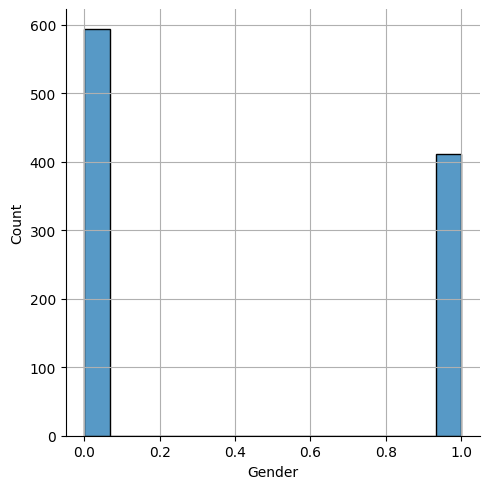

In [ ]:
sns.displot(humans_data['Gender'], bins=15)
plt.grid()
plt.show()

Сколько людей любят математику, видно что большинство ее не любят

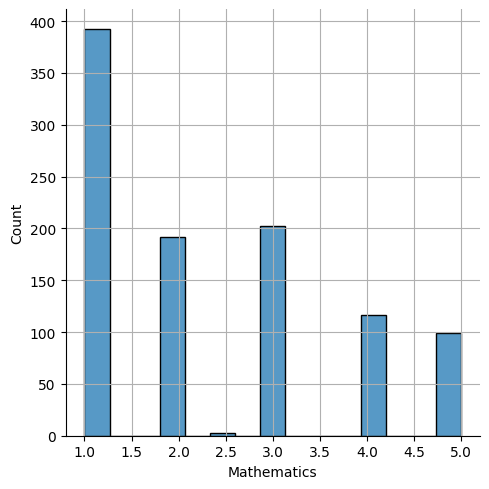

In [ ]:
sns.displot(humans_data['Mathematics'], bins=15)
plt.grid()
plt.show()

Показывает количество курящих людей

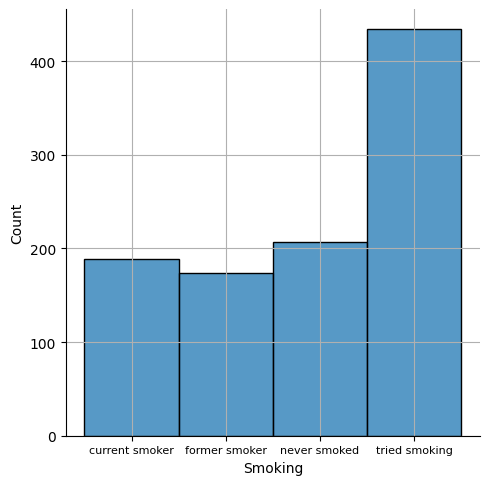

In [ ]:
sns.displot(humans_data['Smoking'], bins=15)
plt.xticks(fontsize=8)
plt.grid()
plt.show()

Пьющих получается больше чем курящих

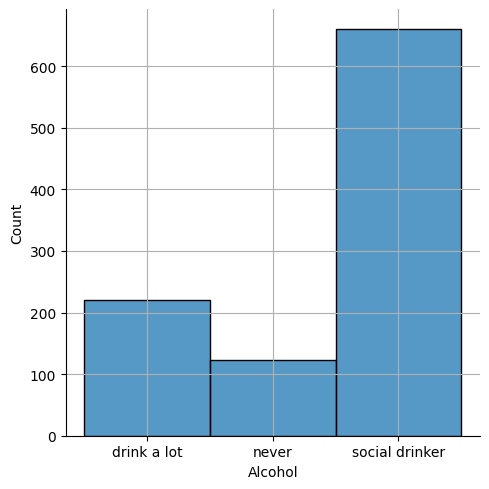

In [ ]:
sns.displot(humans_data['Alcohol'], bins=15)
plt.grid()
plt.show()

Зависимость курения от возраста

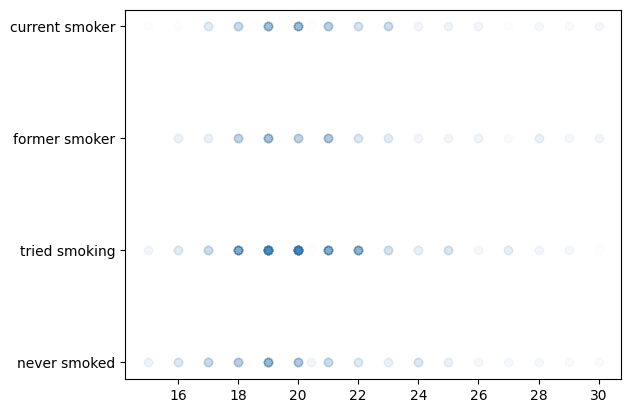

In [ ]:
plt.scatter(humans_data['Age'], humans_data['Smoking'], alpha=0.01)
pass

Зависимость курения от алкоголя

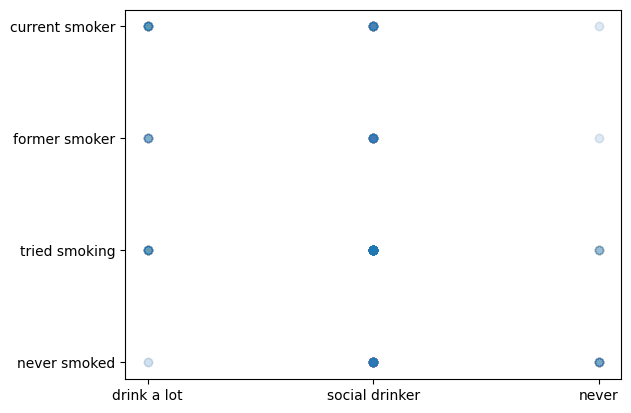

In [ ]:
plt.scatter(humans_data['Alcohol'], humans_data['Smoking'], alpha=0.01)
pass

Зависимость роста на пол. Этот признак больше всего влияет. Мужчины выше женщин

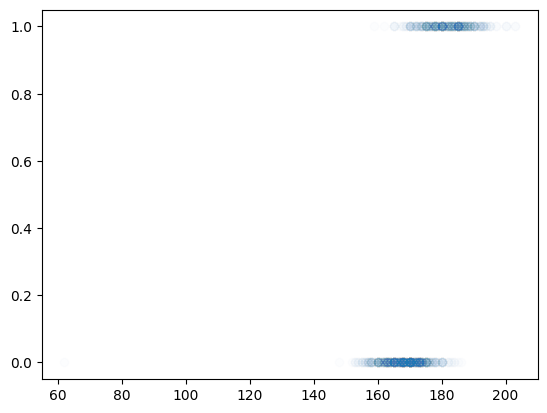

In [ ]:
plt.scatter(humans_data['Height'], humans_data['Gender'], alpha=0.01)
pass

In [ ]:
# Создаем подтаблицу с только числовыми столбцами (типами float64 и int64)
numeric_data = humans_data.select_dtypes(include=['float64', 'int64'])

# Строим матрицу корреляций для подтаблицы
correlation_matrix = numeric_data.corr()

correlation_matrix

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender
Music,1.000000,0.097331,0.081505,0.028466,-0.008628,0.058270,0.063139,0.076289,0.164060,0.025415,...,0.024229,0.045850,0.093765,0.021842,0.072333,-0.078029,-0.066973,-0.130608,-0.006709,-0.102346
Slow songs or fast songs,0.097331,1.000000,0.196591,-0.068579,-0.074110,-0.158521,-0.071503,0.058876,-0.009856,0.056829,...,0.009922,0.113273,0.031232,0.050170,-0.027856,0.010019,0.090269,0.119573,0.009819,0.078658
Dance,0.081505,0.196591,1.000000,0.064168,0.057588,-0.088561,0.074352,0.434711,-0.135411,-0.237263,...,0.053411,0.078145,0.184757,0.082487,0.019991,0.023627,-0.003442,0.009442,0.002175,-0.042669
Folk,0.028466,-0.068579,0.064168,1.000000,0.381783,0.368355,0.261326,0.017122,0.054786,0.070591,...,-0.128962,-0.101733,-0.123927,-0.149697,-0.014448,0.131725,-0.066685,-0.009533,0.095379,-0.040027
Country,-0.008628,-0.074110,0.057588,0.381783,1.000000,0.252641,0.203530,0.005339,0.127605,0.113120,...,-0.051188,-0.064059,-0.093993,0.005605,0.006305,0.074570,0.038279,0.077714,0.033670,0.076826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Age,-0.078029,0.010019,0.023627,0.131725,0.074570,0.037977,0.017386,0.018603,-0.001109,0.003630,...,-0.066332,-0.037164,-0.074642,-0.006290,0.010513,1.000000,0.113330,0.233385,0.090972,0.132185
Height,-0.066973,0.090269,-0.003442,-0.066685,0.038279,0.001951,-0.216270,-0.097591,-0.004350,0.111037,...,0.144685,0.162269,-0.094139,0.225199,0.009950,0.113330,1.000000,0.674727,-0.017518,0.680457
Weight,-0.130608,0.119573,0.009442,-0.009533,0.077714,0.009927,-0.151231,-0.094474,0.008156,0.169032,...,0.103273,0.138170,-0.088810,0.243510,0.027335,0.233385,0.674727,1.000000,-0.028692,0.639233
Number of siblings,-0.006709,0.009819,0.002175,0.095379,0.033670,0.065636,0.062702,-0.053170,-0.006069,0.013566,...,-0.043506,0.028583,-0.041818,-0.028679,-0.084422,0.090972,-0.017518,-0.028692,1.000000,0.033276


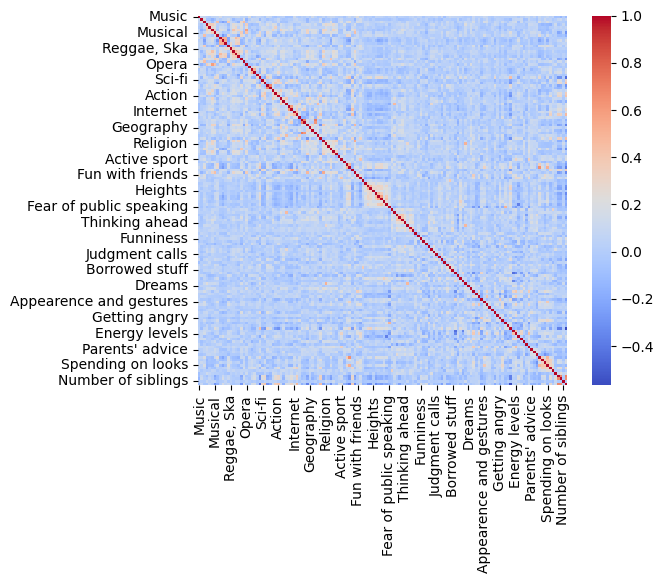

In [ ]:
sns.heatmap(correlation_matrix, square=True, cmap='coolwarm')
pass

Какие признаки больше всего влияют на мужчин. В основном это рост, вес, но так же и увлечения спортом, машинами и тд.

In [ ]:
# Выбор строки, соответствующей гендеру
correlation_with_gender = correlation_matrix['Gender'].drop('Gender')

# Фильтрация корреляций
filtered_correlations = correlation_with_gender[correlation_with_gender > 0.3]

# Сортировка корреляций по убыванию
sorted_correlations = filtered_correlations.sort_values(ascending=False)

print(sorted_correlations)

Height                    0.680457
Weight                    0.639233
PC                        0.461949
Cars                      0.438250
War                       0.412733
Action                    0.408641
Western                   0.360695
Science and technology    0.358454
Sci-fi                    0.307751
Physics                   0.303019
Name: Gender, dtype: float64


Какие признаки больше всего влияют на женщин. Танцы, боязнь темноты, чувственность и тд.

In [ ]:
# Выбор строки, соответствующей гендеру
correlation_with_gender = correlation_matrix['Gender'].drop('Gender')

# Фильтрация корреляций
filtered_correlations = correlation_with_gender[correlation_with_gender < -0.3]

# Сортировка корреляций по убыванию
sorted_correlations = filtered_correlations.sort_values(ascending=False)

print(sorted_correlations)

Dancing          -0.312751
Darkness         -0.322439
Theatre          -0.332654
Spiders          -0.333432
Reading          -0.364171
Shopping         -0.386859
Romantic         -0.438431
Life struggles   -0.565612
Name: Gender, dtype: float64


In [ ]:
# Те признаки которые влияют друг на друга сильнее
correlation_matrix.where(np.triu(correlation_matrix > 0.5, k=1)).stack().sort_values(ascending=False)

,,0
Biology,Medicine,0.707242
Height,Gender,0.680457
Biology,Chemistry,0.680113
Height,Weight,0.674727
Fantasy/Fairy tales,Animated,0.674722
Shopping,Shopping centres,0.650876
Weight,Gender,0.639233
Chemistry,Medicine,0.620733
Classical music,Opera,0.594793
Mathematics,Physics,0.592156


Можно заметить, что человек, любящий математику, любит и физику, а человек, любящий биологию, любит и медицину. Если любят один жанр по типу рока, то любят и похожие на него: метал, панк.

In [ ]:
columns = numeric_data.columns
mean_values = numeric_data[columns].mean()
print("Средние значения:\n", mean_values)

Средние значения:
 Music                         4.731269
Slow songs or fast songs      3.330339
Dance                         3.109000
Folk                          2.285285
Country                       2.121121
                               ...    
Age                          20.424850
Height                      173.521827
Weight                       66.416244
Number of siblings            1.299299
Gender                        0.409363
Length: 140, dtype: float64


In [ ]:
std_values = numeric_data[columns].std()
print("\nСтандартное отклонение (разброс):\n", std_values)


Стандартное отклонение (разброс):
 Music                        0.664370
Slow songs or fast songs     0.830415
Dance                        1.167489
Folk                         1.133947
Country                      1.073725
                              ...    
Age                          2.809304
Height                       9.934571
Weight                      13.703648
Number of siblings           1.010172
Gender                       0.491961
Length: 140, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Разделяем данные на X и y
y = humans_data[['Gender']].copy()
X = humans_data.drop(columns=['Gender'])

# Разделение на обучающую и тестовую выборки
N_train = 600
N_test = humans_data.shape[0] - N_train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=N_train, test_size=N_test, stratify=y, random_state=42
)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Преобразование категориальных переменных в числовые
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Применяем OneHotEncoder ко всем столбцам типа 'object' или 'category'
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Объединяем закодированные и числовые данные
X_train_numeric = pd.concat([X_train.select_dtypes(exclude=['object', 'category']).reset_index(drop=True),
                             pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)
X_test_numeric = pd.concat([X_test.select_dtypes(exclude=['object', 'category']).reset_index(drop=True),
                            pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Обучение модели и предсказания
model = KNeighborsClassifier(n_neighbors=10, p=1)
model.fit(X_train_numeric, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10, p=1)

In [ ]:
# Предсказания и расчет ошибок
y_train_pred = model.predict(X_train_numeric)
y_test_pred = model.predict(X_test_numeric)
train_error = np.mean(y_train['Gender'] != y_train_pred)
test_error = np.mean(y_test['Gender'] != y_test_pred)

train_error, test_error

(0.058333333333333334, 0.08168316831683169)

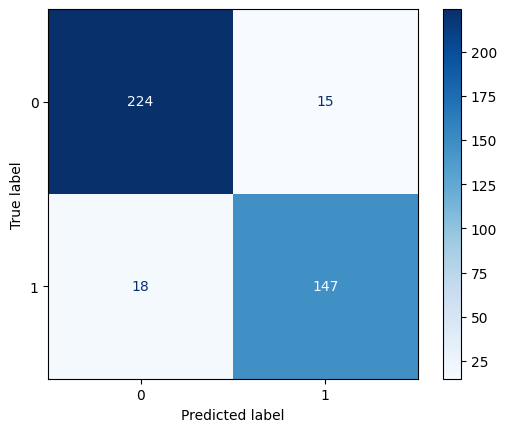

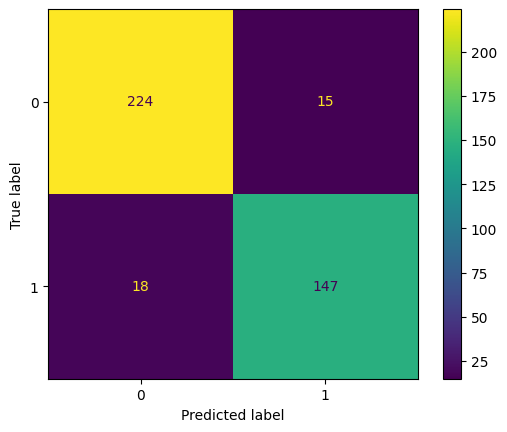

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Построение матрицы ошибок
disp = ConfusionMatrixDisplay.from_estimator(model, X_test_numeric, y_test, cmap=plt.cm.Blues)
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       239
           1       0.91      0.89      0.90       165

    accuracy                           0.92       404
   macro avg       0.92      0.91      0.92       404
weighted avg       0.92      0.92      0.92       404



## Общие выводы

Построенная модель показывает хорошие результаты в задаче классификации пола, используя данные об увлечениях и предпочтениях участников:

1. **Точность на тренировочной выборке**: Ошибка составляет 5,83%, что говорит о высокой степени обучения модели на исходных данных.
2. **Точность на тестовой выборке**: Ошибка на тестовых данных составляет 8,17%, что демонстрирует немного большее расхождение, но все еще подтверждает, что модель не склонна к переобучению и имеет хорошую обобщающую способность.

### Метрики качества модели
- **Точность (accuracy)** на тестовой выборке составляет 92%, что указывает на хорошее общее качество модели.
- **Прецизионность (precision)** для класса 0 (например, женщины) составляет 93%, для класса 1 (например, мужчины) — 91%. Это означает, что модель достаточно точно определяет пол по характеристикам увлечений и предпочтений.
- **Полнота (recall)** для класса 0 составляет 94%, а для класса 1 — 89%. Это указывает на то, что модель лучше распознает представителей класса 0, чем класса 1.
- **F1-мера** также имеет высокие значения для обоих классов (93% для класса 0 и 90% для класса 1), что говорит о сбалансированности между полнотой и точностью модели.

### Заключение
Модель справляется с задачей определения пола на основе информации о предпочтениях, интересах и других характеристиках участников. Высокие значения точности и F1-меры подтверждают её надежность и потенциал для анализа подобных данных.


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

# Load data
humans_data = pd.read_csv('responses.csv')

# Drop rows with missing values in 'Gender' and reset index
humans_data = humans_data.dropna(subset=['Gender']).reset_index(drop=True)

# Separate features and target
y = humans_data[['Gender']].copy()
X = humans_data.drop(columns=['Gender'])

# Handle categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate numerical and encoded categorical data
X_numeric = pd.concat([X.select_dtypes(exclude=['object']).reset_index(drop=True), X_encoded_df], axis=1)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Ensure y has the same number of samples as X_scaled
y = y.iloc[:X_scaled.shape[0]]






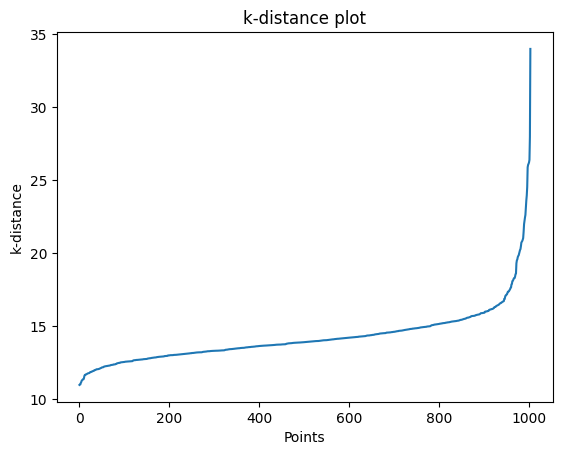

Не удалось найти подходящие параметры для DBSCAN.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score

# Функция для построения k-distance plot
def plot_k_distance(X, k=5):
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, -1], axis=0)
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("k-distance")
    plt.title("k-distance plot")
    plt.show()

# Функция для подбора оптимальных параметров DBSCAN
def find_optimal_dbscan_params(X, y, eps_range, min_samples_range):
    best_eps = None
    best_min_samples = None
    best_ari = -1  # Начальное значение ARI

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan_labels = dbscan.fit_predict(X)

            # Проверяем, что DBSCAN нашел хотя бы два кластера (исключая шум)
            if len(np.unique(dbscan_labels)) > 1:
                ari = adjusted_rand_score(y, dbscan_labels)
                if ari > best_ari:
                    best_ari = ari
                    best_eps = eps
                    best_min_samples = min_samples

    return best_eps, best_min_samples, best_ari

# Построение k-distance plot
plot_k_distance(X_scaled, k=5)

# Диапазоны для перебора параметров
eps_range = np.arange(0.1, 2.0, 0.1)  # Расширенный диапазон для eps
min_samples_range = range(2, 15)      # Расширенный диапазон для min_samples

# Поиск оптимальных параметров
best_eps, best_min_samples, best_ari = find_optimal_dbscan_params(X_scaled, y['Gender'], eps_range, min_samples_range)

# Проверка, найдены ли параметры
if best_eps is None or best_min_samples is None:
    print("Не удалось найти подходящие параметры для DBSCAN.")
else:
    print(f"Best eps: {best_eps}")
    print(f"Best min_samples: {best_min_samples}")
    print(f"Best ARI: {best_ari}")

    # Применение DBSCAN с оптимальными параметрами
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    dbscan_ari = adjusted_rand_score(y['Gender'], dbscan_labels)
    print(f"DBSCAN ARI with optimal parameters: {dbscan_ari}")

In [ ]:
# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_ari = adjusted_rand_score(y['Gender'], kmeans_labels)
print(f"KMeans ARI: {kmeans_ari}")

KMeans ARI: 0.612146065122309


In [ ]:

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(X_scaled)
agg_ari = adjusted_rand_score(y['Gender'], agg_labels)
print(f"Agglomerative Clustering ARI: {agg_ari}")

Agglomerative Clustering ARI: 0.2539727521686896


DBSCAN:

Неудача в поиске параметров: DBSCAN требует тщательного подбора параметров eps (максимальное расстояние между двумя точками для их объединения в один кластер) и min_samples (минимальное количество точек, необходимых для формирования кластера). В данном случае, несмотря на расширенный диапазон параметров, DBSCAN не смог найти подходящие значения. Это может быть связано с тем, что данные имеют сложную структуру, и DBSCAN не смог правильно определить кластеры.

Сложность структуры данных: DBSCAN хорошо работает с данными, которые имеют четко выраженные кластеры и шум. Однако, если данные имеют сложную форму или кластеры перекрываются, DBSCAN может не справиться. В данном случае данные могут быть слишком разнородными или иметь много шума, что затрудняет кластеризацию.

KMeans:

Устойчивость к данным: KMeans работает хорошо, если данные имеют сферические кластеры. В данном случае, несмотря на сложность данных, KMeans смог найти кластеры, которые коррелируют с гендерной переменной (ARI = 0.612). Это говорит о том, что данные могут иметь некоторую сферическую структуру, которую KMeans смог уловить.

Предположения о данных: KMeans предполагает, что кластеры имеют одинаковый размер и форму. Если данные не соответствуют этим предположениям, KMeans может работать хуже. Однако в данном случае он показал хорошие результаты.

Agglomerative Clustering:

Менее устойчивый результат: Agglomerative Clustering показал более низкий ARI (0.254), что может быть связано с тем, что он менее устойчив к шуму и сложной структуре данных. Этот метод строит кластеры путем объединения ближайших точек, и если данные имеют сложную структуру, это может привести к неправильной кластеризации.

Отсутствие глобальной оптимизации: В отличие от KMeans, Agglomerative Clustering не оптимизирует глобальную функцию (например, сумму квадратов расстояний), что может привести к менее качественным результатам.



1. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN — это метод кластеризации, основанный на плотности данных. Он не требует заранее указывать количество кластеров и может автоматически определять кластеры произвольной формы, а также выделять шум (выбросы).

Основные идеи:
Плотность: DBSCAN группирует точки данных, которые находятся близко друг к другу (в пределах заданного расстояния eps) и имеют достаточное количество соседей (min_samples).

Кластеры произвольной формы: В отличие от KMeans, DBSCAN может находить кластеры сложной формы, такие как длинные цепочки или изогнутые области.

Шум: Точки, которые не принадлежат ни одному кластеру, помечаются как шум (выбросы).

Алгоритм:
1.Для каждой точки проверяется, сколько точек находится в радиусе eps.

2.Если точка имеет достаточно соседей (min_samples), она становится "ядровой" и начинает формировать кластер.

3.Все соседи ядровой точки также добавляются в кластер, и процесс продолжается рекурсивно для новых точек.

4.Точки, которые не являются ядровыми, но находятся в радиусе eps от ядровой точки, считаются "граничными".

5.Точки, у которых недостаточно соседей, помечаются как шум.

Преимущества:
Не требует заранее указывать количество кластеров.

Может находить кластеры произвольной формы.

Устойчив к шуму и выбросам.

Недостатки:
Чувствителен к выбору параметров eps и min_samples.

Плохо работает на данных с переменной плотностью (если плотность кластеров сильно различается).

Неэффективен на больших наборах данных из-за высокой вычислительной сложности.

2. KMeans
KMeans — это метод кластеризации, который группирует данные путем минимизации суммы квадратов расстояний между точками и центрами кластеров (центроидами).

Основные идеи:
Центроиды: Каждый кластер представлен своим центроидом — средним значением всех точек в кластере.

Итеративный процесс: Алгоритм итеративно перемещает центроиды, чтобы минимизировать сумму квадратов расстояний.

Сферические кластеры: KMeans предполагает, что кластеры имеют сферическую форму и одинаковый размер.

Алгоритм:
1.Инициализируются K центроидов (например, случайным выбором точек).

2.Каждая точка данных назначается ближайшему центроиду.

3.Пересчитываются центроиды как среднее значение всех точек в кластере.

4.Шаги 2 и 3 повторяются до тех пор, пока центроиды не перестанут изменяться.

Преимущества:
Прост в реализации и интерпретации.

Быстро работает на небольших и средних наборах данных.

Хорошо подходит для данных со сферическими кластерами.

Недостатки:
Требует заранее указывать количество кластеров K.

Чувствителен к начальному положению центроидов (используются методы вроде K-Means++ для улучшения инициализации).

Плохо работает на данных с кластерами сложной формы или переменной плотности.

Не устойчив к шуму и выбросам.

3. Agglomerative Clustering (Иерархическая кластеризация)
Agglomerative Clustering — это метод иерархической кластеризации, который строит кластеры путем объединения (агломерации) ближайших точек или кластеров.

Основные идеи:
Иерархия кластеров: Строится дерево кластеров (дендрограмма), где каждая точка начинается как отдельный кластер, а затем объединяется с ближайшими кластерами.

Метрика расстояния: Используется для определения близости между точками или кластерами (например, евклидово расстояние, манхэттенское расстояние).

Связь между кластерами: Определяет, как объединять кластеры (например, полное связывание, простое связывание, среднее связывание).

Алгоритм:
1.Каждая точка данных рассматривается как отдельный кластер.

2.На каждом шаге объединяются два ближайших кластера.

3.Процесс продолжается до тех пор, пока не останется заданное количество кластеров или пока все точки не объединятся в один кластер.

Преимущества:
Не требует заранее указывать количество кластеров (можно выбрать его после построения дендрограммы).

Может находить кластеры сложной формы.

Позволяет визуализировать иерархию кластеров с помощью дендрограммы.

Недостатки:
Вычислительно сложный (особенно на больших наборах данных).

Чувствителен к выбору метрики расстояния и метода связывания.

Неэффективен на данных с большой размерностью.
